### **THE SPARKS FOUNDATION - DATA SCIENCE & BUSINESS ANALYTICS**

### **Author : Midhir Nambiar**

### **Task : Exploratory Data Analysis on Superstore - Retail**

As a business manager , we are required to find out the areas where you can work to make more profit.

### **IMPORTING LIBRARIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### **DATA ANALYSIS ON SUPERSTORE DATA**

Reading and Loading the Dataset

In [ ]:
df = pd.read_csv('/content/SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [ ]:
df.tail()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.248,3,0.2,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.960,2,0.0,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.576,2,0.2,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.600,4,0.0,13.3200
9993,Second Class,Consumer,United States,Westminster,California,92683,West,Office Supplies,Appliances,243.160,2,0.0,72.9480


Shape of the Dataset

In [ ]:
print(df.shape)

(9994, 13)


Check for null values if any

In [ ]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Check for duplicates if any

In [ ]:
df.duplicated().sum()

17

Dropping the duplicates

In [ ]:
df.drop_duplicates(inplace = True)

In [ ]:
df.drop(['Postal Code'] , axis = 1 , inplace = True)

Viewing the columns

In [ ]:
df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Region',
       'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

Information about the Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9977 entries, 0 to 9993
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9977 non-null   object 
 1   Segment       9977 non-null   object 
 2   Country       9977 non-null   object 
 3   City          9977 non-null   object 
 4   State         9977 non-null   object 
 5   Region        9977 non-null   object 
 6   Category      9977 non-null   object 
 7   Sub-Category  9977 non-null   object 
 8   Sales         9977 non-null   float64
 9   Quantity      9977 non-null   int64  
 10  Discount      9977 non-null   float64
 11  Profit        9977 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 1013.3+ KB


Description about the Dataset

In [ ]:
df.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


### **DATA VISUALISATION**

**Correlation between the data**

In [ ]:
df.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200722,-0.028311,0.479067
Quantity,0.200722,1.000000,0.008678,0.066211
Discount,-0.028311,0.008678,1.000000,-0.219662
Profit,0.479067,0.066211,-0.219662,1.000000


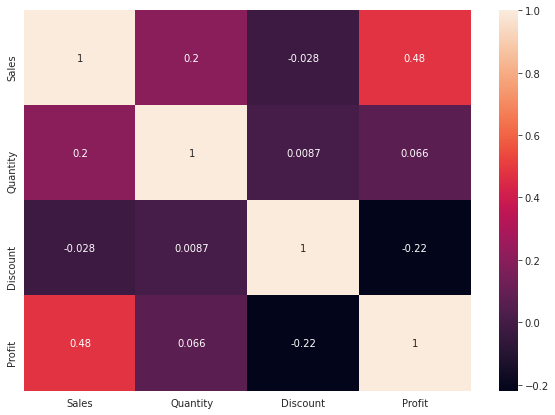

In [ ]:
plt.figure(figsize = (10,7))
sns.heatmap(df.corr() , annot = True)
plt.show()

**Visualisation on 'Ship Mode'**

In [ ]:
df['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

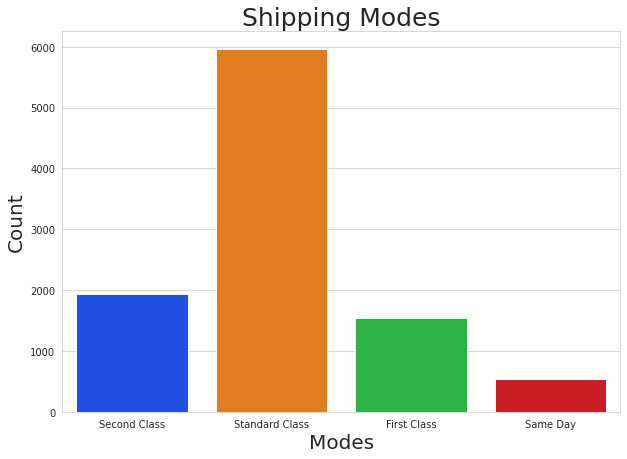

In [ ]:
plt.figure(figsize = (10,7))
sns.countplot(df['Ship Mode'] , palette = 'bright')
plt.title('Shipping Modes' , fontsize = 25)
plt.xlabel('Modes',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.show()

Observation : **Standard Class** is the most preferred shipping mode.

**Visualisation on the 'Segment'**

In [ ]:
df['Segment'].value_counts()

Consumer       5183
Corporate      3015
Home Office    1779
Name: Segment, dtype: int64

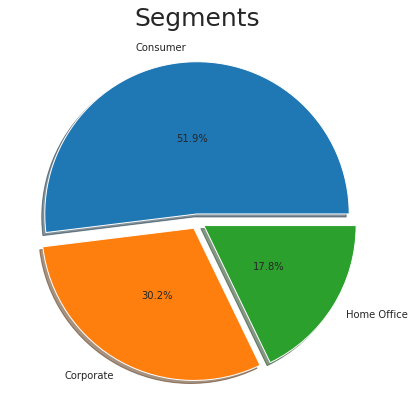

In [ ]:
plt.figure(figsize = (10,7))
plt.pie(df['Segment'].value_counts() ,labels = df['Segment'].value_counts().index , shadow = True , 
        explode = [0.05]*3 , pctdistance = 0.5 , autopct = '%.1f%%' )
plt.title('Segments',fontsize = 25)
plt.show()

Observation : The **Consumer** is the most preffered segment

**Pair Plot of the 'Segment' data**

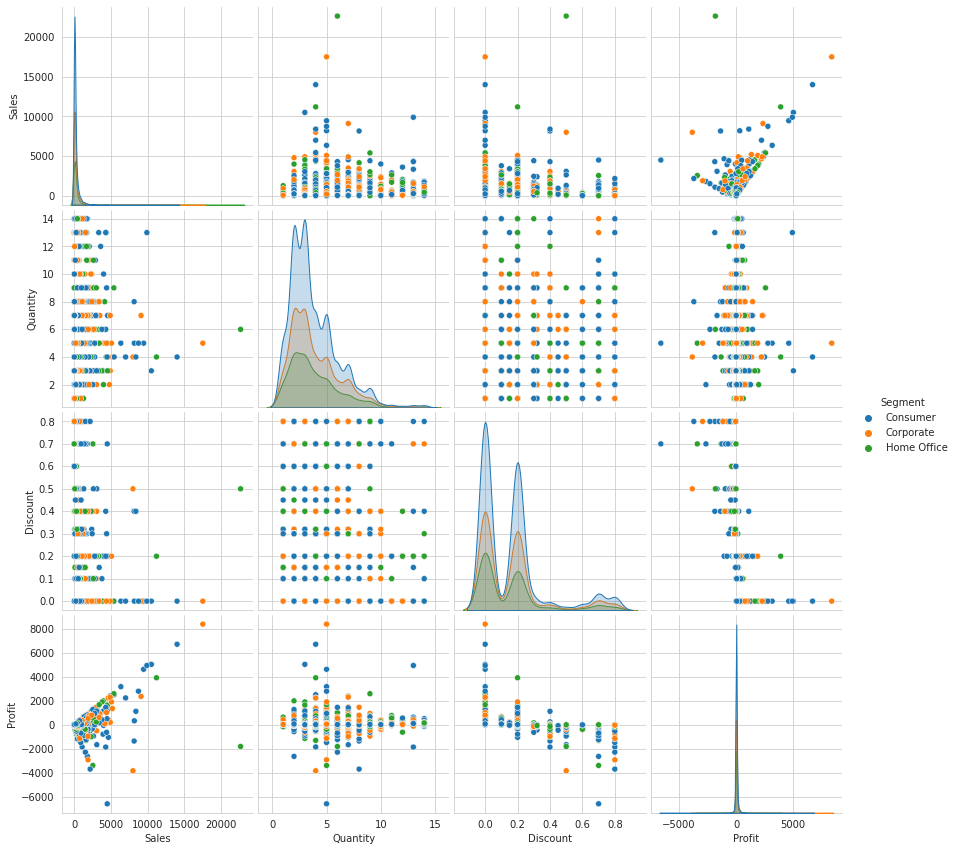

In [ ]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(df, hue = 'Segment', height = 3)
plt.show()

Observation : From the above pairplot ,we observe that there is a positive correlation in **profit** and **sales**

**Visualisation on 'Category'**

In [ ]:
df['Category'].value_counts()

Office Supplies    6012
Furniture          2118
Technology         1847
Name: Category, dtype: int64

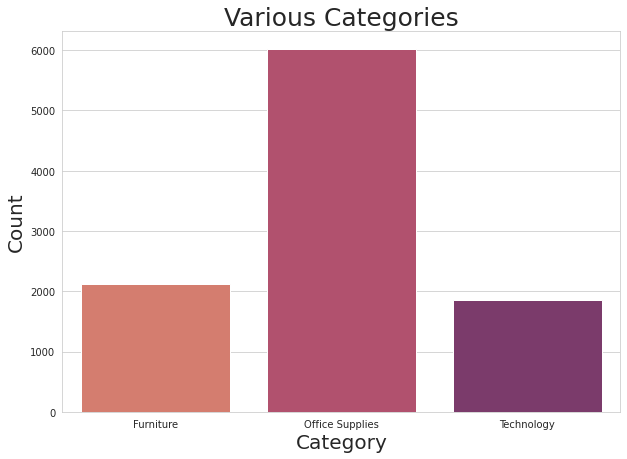

In [ ]:
plt.figure(figsize = (10,7))
sns.countplot(df['Category'] , palette = 'flare')
plt.title('Various Categories' , fontsize = 25)
plt.xlabel('Category',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.show()

Observation : **Office Supplies** are one of the most demanded categories

**Visualisation on the 'Sub Category'**

In [ ]:
df['Sub-Category'].value_counts()

Binders        1522
Paper          1359
Furnishings     956
Phones          889
Storage         846
Art             795
Accessories     775
Chairs          615
Appliances      466
Labels          363
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

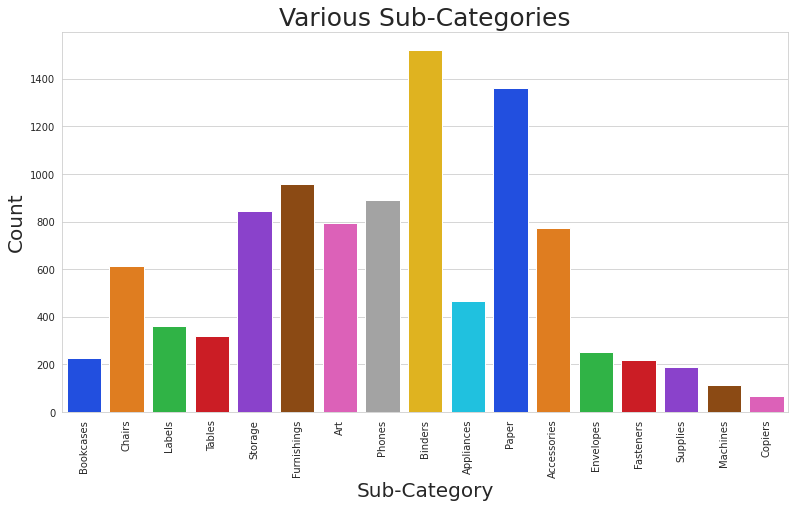

In [ ]:
plt.figure(figsize = (13,7))
sns.countplot(df['Sub-Category'] , palette = 'bright')
plt.xticks(rotation = 90)
plt.title('Various Sub-Categories' , fontsize = 25)
plt.xlabel('Sub-Category',fontsize = 20)
plt.ylabel('Count',fontsize = 20)
plt.show()

Observation : **Binders **is one of the most demanded sub-category

**Visualisation on 'State'**

In [ ]:
df['State'].value_counts()

California              1996
New York                1127
Texas                    983
Pennsylvania             586
Washington               502
Illinois                 491
Ohio                     468
Florida                  383
Michigan                 254
North Carolina           249
Arizona                  224
Virginia                 224
Georgia                  184
Tennessee                183
Colorado                 182
Indiana                  149
Kentucky                 139
Massachusetts            135
New Jersey               130
Oregon                   123
Wisconsin                110
Maryland                 105
Delaware                  96
Minnesota                 89
Connecticut               82
Missouri                  66
Oklahoma                  66
Alabama                   61
Arkansas                  60
Rhode Island              56
Mississippi               53
Utah                      53
Louisiana                 42
South Carolina            42
Nevada        

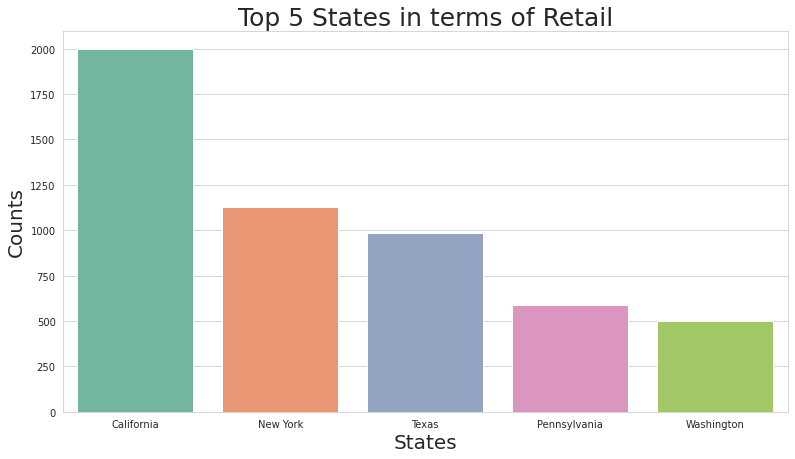

In [ ]:
plt.figure(figsize=(13,7))
state = df['State'].value_counts().reset_index()
state.columns = ['State','count']
sns.barplot(x = 'State',y = 'count', data = state[:5] , palette = 'Set2')
plt.title('Top 5 States in terms of Retail', fontsize = 25)
plt.xlabel('States', fontsize = 20)
plt.ylabel('Counts',fontsize = 20)
plt.xticks(rotation=0)
plt.show()

Observation : **California** is the only state which does maximum retail

**Visualisation on 'City'**

In [ ]:
df['City'].value_counts()

New York City    914
Los Angeles      746
Philadelphia     536
San Francisco    506
Seattle          424
                ... 
Davis              1
Elyria             1
Iowa City          1
La Quinta          1
Whittier           1
Name: City, Length: 531, dtype: int64

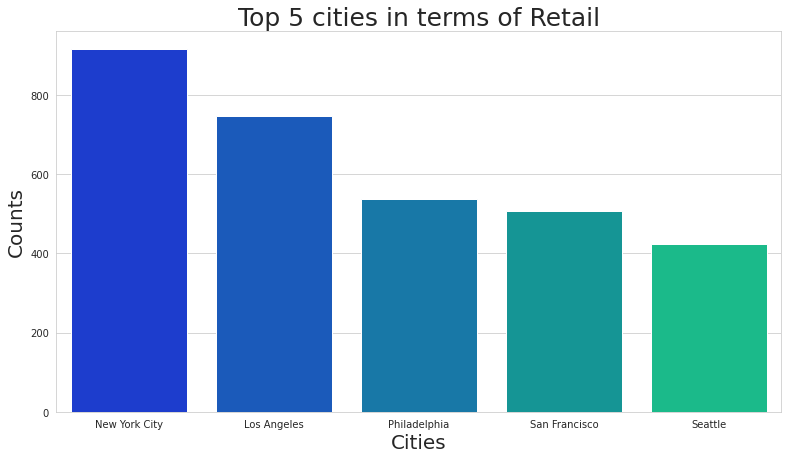

In [ ]:
plt.figure(figsize=(13,7))
state = df['City'].value_counts().reset_index()
state.columns = ['City','count']
sns.barplot(x = 'City',y = 'count', data = state[:5], palette = 'winter')
plt.title('Top 5 cities in terms of Retail', fontsize = 25)
plt.xlabel('Cities', fontsize = 20)
plt.ylabel('Counts',fontsize = 20)
plt.xticks(rotation=0)
plt.show()

Observation : **NYC** is the city to do maximum retail.

**Visualisation of 'Region'**

In [ ]:
df['Region'].value_counts()

West       3193
East       2845
Central    2319
South      1620
Name: Region, dtype: int64

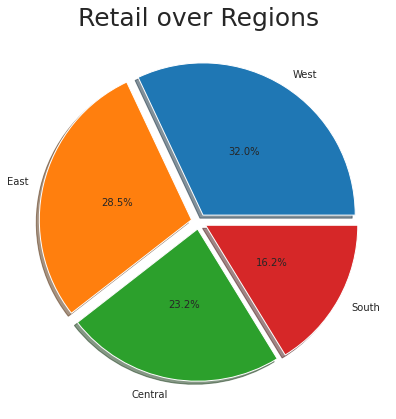

In [ ]:
plt.figure(figsize = (10,7))
plt.pie(df['Region'].value_counts() ,labels = df['Region'].value_counts().index , shadow = True , 
        explode = [0.05]*4 , pctdistance = 0.5 , autopct = '%.1f%%' )
plt.title('Retail over Regions',fontsize = 25)
plt.show()

Observation : Maximum retails were carried over the **West** region

**Line Plot of 'Discount' V 'Profit'**

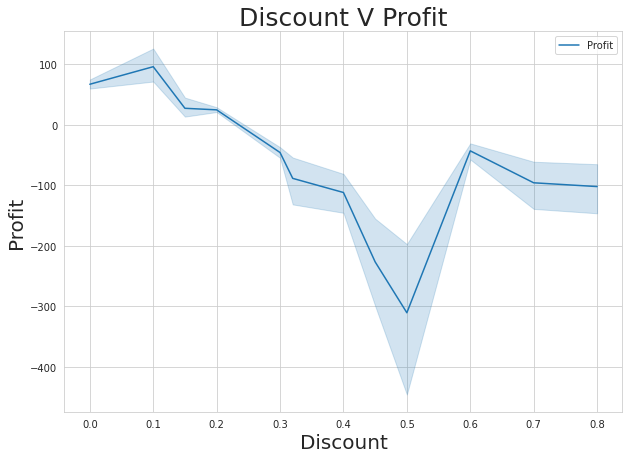

In [ ]:
plt.figure(figsize = (10,7))
sns.lineplot(x='Discount',y='Profit',label='Profit',data=df)
plt.legend()
plt.title('Discount V Profit',fontsize = 25)
plt.xlabel('Discount',fontsize = 20)
plt.ylabel('Profit',fontsize = 20)
plt.show()

Observation : **Discount** has a **negative relation** with **Profit**

**Bar Plot of 'Sales' V 'Profit' Regionwise**

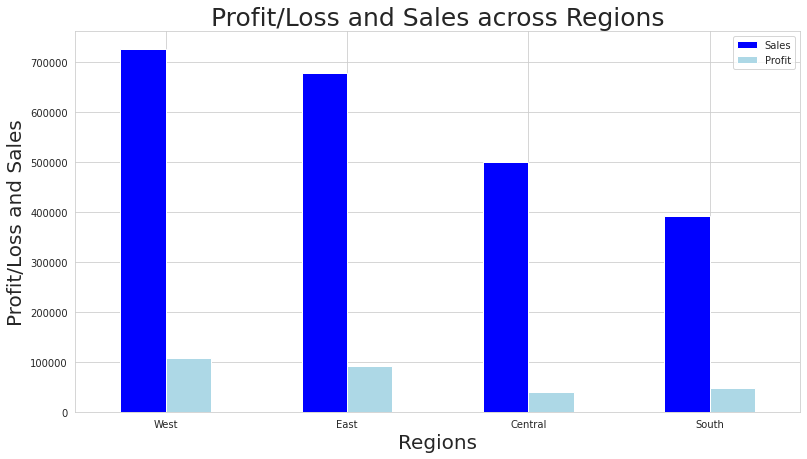

In [ ]:
sp = df.groupby('Region')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
sp[:].plot.bar(color=['blue','lightblue'] , figsize =(13,7))
plt.title('Profit/Loss and Sales across Regions',fontsize = 25)
plt.xlabel('Regions',fontsize = 20)
plt.ylabel('Profit/Loss and Sales',fontsize = 20)
plt.xticks(rotation = 0)
plt.show()

Observation : **Sales & Profit** are seen maximum in the **West** region

**Bar Plot of 'Sales' V 'Profit' Citywise**

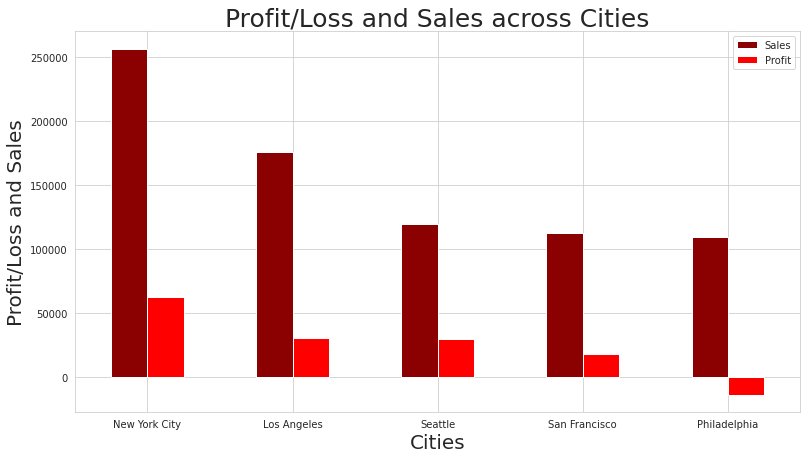

In [ ]:
sp = df.groupby('City')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
sp[:5].plot.bar(color=['darkred','red'] , figsize =(13,7))
plt.title('Profit/Loss and Sales across Cities',fontsize = 25)
plt.xlabel('Cities',fontsize = 20)
plt.ylabel('Profit/Loss and Sales',fontsize = 20)
plt.xticks(rotation = 0)
plt.show()

Observation : **Sales & Profit** are seen maximum in **NYC**

**Bar Plot of 'Sales' V 'Profit' Statewise**

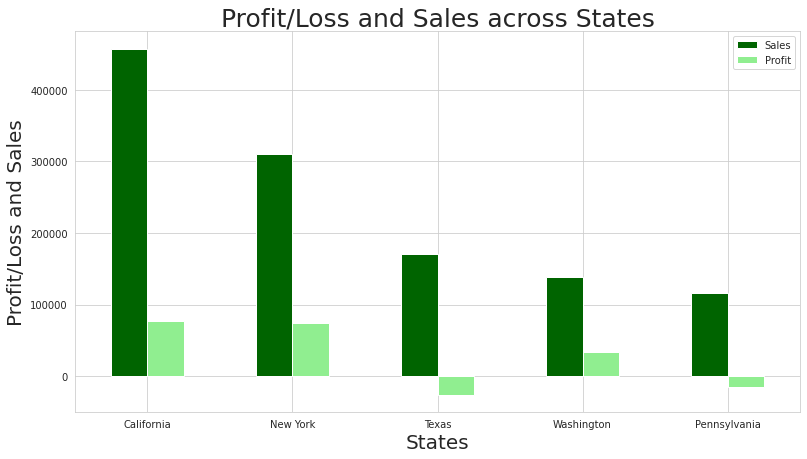

In [ ]:
sp = df.groupby('State')[['Sales','Profit']].sum().sort_values(by='Sales',ascending=False)
sp[:5].plot.bar(color=['darkgreen','lightgreen'] , figsize =(13,7))
plt.title('Profit/Loss and Sales across States',fontsize = 25)
plt.xlabel('States',fontsize = 20)
plt.ylabel('Profit/Loss and Sales',fontsize = 20)
plt.xticks(rotation = 0)
plt.show()

Observation : **California** is the State with maximum of **Sales & Profit**

### **CONCLUSION**

Final Conclusions :
1. Most preferred shipping mode : **Standard Class**
2. Most preferred segment : **Consumer**
3. Most Demanded Category : **Office Supplies**
4. Most Demanded Sub Category : **Binders**
5. State with maximum retail : **California**
6. City with maximum retail : **New York City**
7. Maximum retail over regions : **West**





We come to a conclusion that **Firstly** we need to work more on California and NYC as they are the places where maximum sales happen. **Secondly** the discount in southern regions has to be decreased to increase the sales. **Lastly** the profit generated from office supplies is more , but the sales are less, so we need to work on that as well

### **THANK YOU**